# Customer Lifetime Value Evaluation

Outline
* [Introduction](#intro)
* Gone for Good type of model
    * [Simple retention model](#simple)
    * [General retention model](#general)
    * [Example](#example_retention_model)
* Always a share type of model
    * [Markov chain models](#markov)
* [Reference](#refer)
    

---

## <a id='intro'>Introduction</a>

According to wikipedia

**Customer lifetime value** can be defined as the dollar value of a customer relationship, based on the present value of the projected future cash flows from the customer relationship. Customer lifetime value is an important concept in that it encourages firms to shift their focus from quarterly profits to the long-term health of their customer relationships. Customer lifetime value is an important number because it represents an upper limit on spending to acquire new customers. For this reason it is an important element in calculating payback of advertising spent in marketing mix modeling.

To estimate CLV, there are two situations
* **Gone for good**: customers generate period cash flows until they cancel, and then they never come back. This is also called the retention model. For example, subscriptions (cable TV, cell phones), services, media.
    * – Simple retention model: retention rates constant across customers and time
    * – General retention model / survival analysis: retention rates vary over time and as a function of customer characteristics (covariates)
    * – Beta-geometric: retention rates vary randomly over customers, no covariates

* **Always a share**: customer inactivity during a period does not mean the customer is “gone,” e.g., retailers, airlines, hotels, nonprofits.
    * – Markov chain models
    * – Regression approaches
    * – Negative binomial (NBD)/Pareto

## <a id='simple'>Simple retention model</a>

**Assumption**
* Retention rate are independent of each other across time
* Rerention rate are constant across customer and time
* Periodical payment is constant across time
* Time between period is constant

**Calculating Present Value**

$$PV_t = m\frac{1-(1+d)^{-t}}{d}$$

**Calculating Customer Lifetime Value**

$$E(CLV) = \frac{mr}{1+d-r}$$


**Estimating Retention Rate**

How do we estimate the overall retention rate for simple retention model?
Before we dive into how to get an overall retention rate, let's first see what does "censor" mean:

```
Observations are called censored when the information about their survival time is incomplete; the most commonly encountered form is right censoring. Suppose patients are followed in a study for 20 weeks. A patient who does not experience the event of interest for the duration of the study is said to be right censored. The survival time for this person is considered to be at least as long as the duration of the study. Another example of right censoring is when a person drops out of the study before the end of the study observation time and did not experience the event.
```

Therefore, an customer is censored when he/she doesn't cancel by the end of the study or the person drops out of the study before the study ends.

Suppose $n_1$ customers have canceled, and $n_0$ are censored. Let $t_1, t_2, \dots, t_n$ be cancel times and $c_1, c_2, \dots, c_m$ be the censoring. Then the likelihood function given these condition is 

$$L(r) = \prod_{i=1}^{n_1} (1-r) r^{t_i-1} \prod_{i=1}^{n_0} r^{c_i}$$

The first product indicates the likelihood for canceled customers; the second product indicate the likelihood for censored customers. We can obtain an overall likelihood by changing the retention rate $r$.

The retention rate that maximize the likelihood function is 

$$\hat{r} = \frac{\sum{t_t}+ \sum{c_t} + n_1}{\sum{t_t}+\sum{c_t}} = 1 - \frac{n_1}{\sum{t_t}+ \sum{c_t}}$$

Using an analogy of a coin flip experiment to this case, we can think of $\sum{t_t}+ \sum{c_t}$ as the total number of flips and $n_1$ as total number of fail. Therefore, $\frac{n_1}{\sum{t_t}+ \sum{c_t}}$ indicate the probability of cancelation, and 1 minus it indicates the retention rate.

## <a id='general'>General Retention Model</a>

**Idea**

What if retention rates vary across time? In this case, the expected CLV is no longer the formula that we saw above. We will need to estimate the probabilty that the user cancel or leave in each of the time t and also the present value of the periodical cash flow.

Survival analysis can be used in estimating the probabilty that the user cancel or leave in each of the time *t*. Therefore, in the following post, we will first discuss several concept of survival analysis and then see how it can be used to calculate the customer lifetime value.

**Survival Analysis**

Survival analysis is a branch of statistics for analyzing the expected duration of time until one or more events happen. Why do we need survival analysis for general retention model? We need survival analysis since it is a way to estimate how long the customer is going to leave. Here are some of the functions introduced in survival analysis:

* **Survival Function**: it is a function that represent the chance taht the customer cancels at time *t* or later, or equivalently, that the customer is retained the first *t-1* periods:

$$S(t) = P(T\ge t) = \prod_{i=1}^{t-1}r_i = r^{t-1}S(t-1)$$

* **Probability Mass Function**: the function gives the probability that a customer is retained during the first *t-1* periods and not retained during period t:

$$f(t) = P(T=t) = S(t)(1-r_t) = S(t) - S(t+1)$$

* **Hazard Rate**: the conditioal probability that the customer cancels at time *t*, given that the customer has not already canceled. In other words, given that I survive now at time *t*, what is the probability that I go away right now:

$$\pi_t = P(T=t|T\ge t) = \frac{P(T=t)}{S(t)} = 1-r_t$$

Note that some common shapes of hazard rate function with t as x axis are exponential and bath tub shape.

**Assumption**
* Retention rate are independent of each other across time
* The simple retention model assume retention rate is constant across time. The general retention model relaxes this assumption
* Periodical payment is constant across time
* Time between period is constant

**Calculating Customer Lifetime Value**

Let $m_t$ be the discount cash flows at time *t=0,1*$\dots$, then lifetime value is a function of cancelation time *t*:
$$CLV(t) =\sum_{i=0}^{t-1}m_i$$

The expected value of CLV(T) is:

$$E[CLV(T)] = \sum_{t=1}^{\infty} P(t) CLV(t) = \sum_{t=1}^{\infty} P(t) \sum_{t=0}^{t-1}m_i$$

The idea is that we want to get the probability of surviving in each of the time t multiple by the lifetime value if a customer survive until time *t*, this equals to the expected customer lifetime value.

Writing out the sum over *t* horizontally and then sum over *i* vertically, the equaltion becomes:

<img src="_pic/eclv.png" style="width: 550px;height: 200px;"/>

Thus E[CLV(T)] can be evaluated with either

$$E[CLV(T)] = \sum_{t=1}^{\infty} P(t) CLV(t) = \sum_{t=1}^{\infty} m_{t-1} S(t)$$


**Estimating retention rate with Survival Analysis using Kaplan-Meier Method**

Kaplan-Meier Method is a nonparametric way to estimate the survival rate for each time *t*. 
* Let $n_t$ be the nubmer of customers "at risk" at time *t*
* Let $d_t$ be the number of customers who cancel at time *t*
* The product-moment estimate of the survival function is
$$\hat{S}(t) = \prod_{i \le t} \Big( 1-\frac{d_i}{n_i}  \Big)$$

Let find the following example to see how to calculate the estimate of Survival function using KM 

<img src="_pic/km_example.png" style="width: 550px;height: 550px;"/>

We can see in *T=1*, there are three customer censored, meaning that these 3 customers are droped out from the experiment for some reason. Therefore, for *T=2*, the $n_t$ equals 671-3. 

In *T=2*, we can see that there are 4 customers canceled and 0 customers censored. The probability of cancelation in this time period is $1-\frac{4}{668} = 0.994$ and the survival probabilty is the product of the probabilty since the first period, i.e., $1 \times 0.994$.

For *T=3*, we can see that there are 16 customers canceled and 2 customers censored. The probability of cancelation in this time period is $1-\frac{16}{668-4} = 0.9759$ and the survival probabilty is the product of the probabilty since the first period, i.e., $1 \times 0.994 \times 0.9759 = 0.9701$. 

The final estimate using KM method is shown in the following plot:

<img src="_pic/km_curve.png" style="width: 500px;height: 400px;"/>

## <a id="example_retention_model">Example: Calculating the CLV for a service provider using Retention Model</a>

In the following example, we will use a sample data from a service provider with three kinds of customers. The difference between each kind of customer is the start length, indicating the length of the contract when the customer firstly sign up for the service. The length can be 1 month, 6 months, or 12 months.

The goal is to estimate the the probabilty that the customer cancels at time t or later for each of the time period using Kaplan-Meier method.

In [3]:
library(survival)

In [30]:
service5yr = read.table("_data/service5yr.txt", header=T) 

In [32]:
head(service5yr)
summary(service5yr)

startlen,bigT,cancel,count
1,1,0,7
1,2,0,4
1,2,1,296
1,3,0,13
1,3,1,1318
1,4,0,22


    startlen           bigT           cancel           count       
 Min.   : 1.000   Min.   : 1.00   Min.   :0.0000   Min.   :   1.0  
 1st Qu.: 1.000   1st Qu.:18.00   1st Qu.:0.0000   1st Qu.:  16.0  
 Median : 6.000   Median :32.00   Median :1.0000   Median :  56.0  
 Mean   : 6.087   Mean   :31.58   Mean   :0.5134   Mean   : 182.5  
 3rd Qu.:12.000   3rd Qu.:46.00   3rd Qu.:1.0000   3rd Qu.: 154.5  
 Max.   :12.000   Max.   :60.00   Max.   :1.0000   Max.   :3603.0  

Call: survfit(formula = Surv(bigT, cancel) ~ 1, data = service5yr, 
    weights = count)

 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    2  61133     392    0.994 0.000323        0.993        0.994
    3  60737    1555    0.968 0.000710        0.967        0.970
    4  59169    2762    0.923 0.001079        0.921        0.925
    5  56385    2231    0.886 0.001283        0.884        0.889
    6  54128    2158    0.851 0.001440        0.848        0.854
    7  51668    5486    0.761 0.001728        0.757        0.764
    8  45997    2268    0.723 0.001814        0.720        0.727
    9  43396    2210    0.686 0.001883        0.683        0.690
   10  41012    1658    0.659 0.001926        0.655        0.662
   11  39257    1271    0.637 0.001955        0.633        0.641
   12  37764    1270    0.616 0.001979        0.612        0.620
   13  34859    4924    0.529 0.002052        0.525        0.533
   14  29418    1590    0.500 0.002062        0.496        0.504


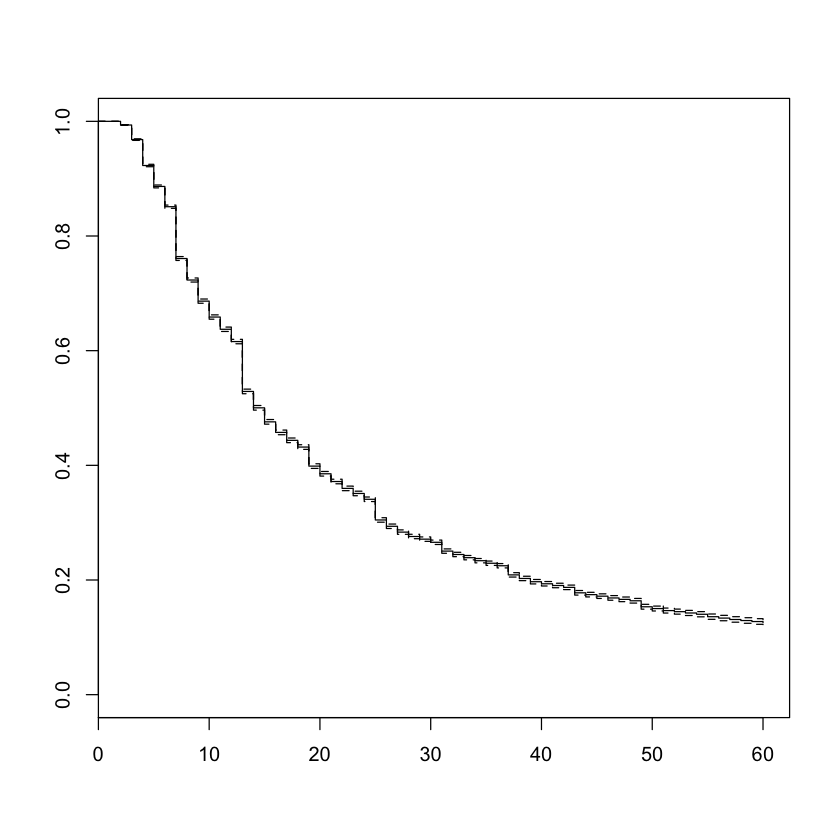

In [48]:
fit = survfit(Surv(bigT, cancel) ~ 1, data=service5yr, weight=count)
summary(fit)
plot(fit)

In [36]:
fit2 = survfit(Surv(bigT, cancel) ~ startlen, data=service5yr, weight=count)
summary(fit2)

Call: survfit(formula = Surv(bigT, cancel) ~ startlen, data = service5yr, 
    weights = count)

                startlen=1 
 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    2  34026     296   0.9913 0.000503       0.9903       0.9923
    3  33726    1318   0.9526 0.001152       0.9503       0.9548
    4  32395    2403   0.8819 0.001750       0.8785       0.8853
    5  29970    1926   0.8252 0.002060       0.8212       0.8293
    6  28018    1871   0.7701 0.002282       0.7657       0.7746
    7  25999    1806   0.7166 0.002446       0.7118       0.7214
    8  24048    1633   0.6680 0.002560       0.6630       0.6730
    9  22155    1461   0.6239 0.002637       0.6188       0.6291
   10  20562    1187   0.5879 0.002684       0.5827       0.5932
   11  19300    1070   0.5553 0.002714       0.5500       0.5606
   12  18085    1050   0.5231 0.002733       0.5177       0.5284
   13  16413    1125   0.4872 0.002747       0.4819       0.4926
   14  15009     987   0.4552 

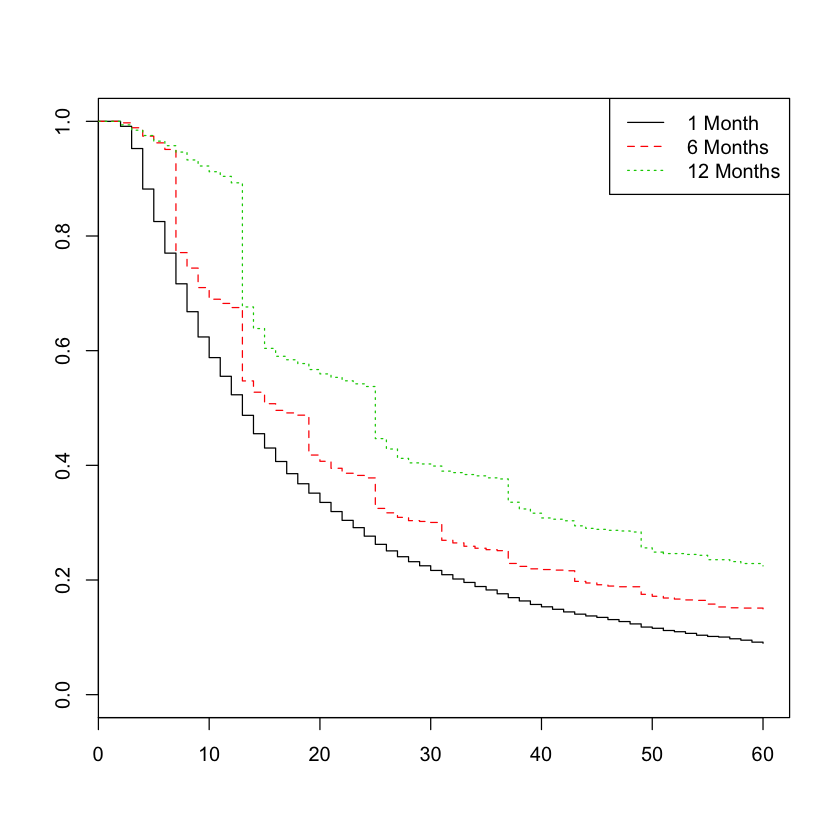

In [40]:
plot(fit2, col=1:3, lty=1:3)
legend("topright", paste("",c('1 Month','6 Months', '12 Months')), col=1:3, lty=1:3)

From the above plot, we can see that the survival curve for customer with 1 month plan is under the other two, indicating that the survival probability, i.e., the probabilty that the customer remain sign up at time t or later is lower than the customers in the other two plans.

We can also see that for customer in the 6 months plan, their survival probabilty drops for every 6 months, indicating that a portion of the customer cancel their plan after their 6 months plan expires. We can see a similar trend for customers using 12 months plan.

**Calculating CLV using general retention model**

Recall that the company makes $23.2 profit per customer at the beginning of each period. We can use survival probabilty estimate by KM method plugging into the equation that we have previously to get an estimate of the expected customer lifetime value:

$$E(CLV) = \sum_{t=1}^{\infty} m_{t-1} S(t)$$

In [60]:
clv_grm <- function(fit, profit, discount_rate){
#     calcuate the expected customer lifetime value according to the survival probability estimated using Kaplan-Meier method

#     Parameters
#     ----------
#     fit: a fit object obtained from survfit funciton
#     profit: profit per customer at the beginning of each period
#     discount_rate: the period discount rate

#     Return
#     ----------
#     Expected customer lifetime value 

#     Note
#     ----------
#     fit$surv: the survival probabilty
#     profit/((1+discount_rate)^(fit$time-1)): the discounted cash flow

    return(sum(fit$surv*profit/((1+discount_rate)^(fit$time-1))))
}

In [61]:
clv_grm(fit, 23.2, 0.01)

[1] 424.1123

**Calculating CLV using simple retention model**

From the previous section, we can see that we can get the overall retention rate of the customers using the equation:

$$\hat{r} = 1 - \frac{n_1}{\sum{t_t}+ \sum{c_t}}$$

In this case, 
* $n_1$: the number of people who canceled
* $\sum{t_t}+ \sum{c_t}$: the total number of coin flips


To get the expected CLV, we can use the equation introduced prevously:

$$E(CLV) = \frac{mr}{1+d-r}$$

In [68]:
srm_r <- function(dat){
    # total flips
    total_flips = sum(dat$bigT*dat$count)
    
    # total fail
    fail = sum(dat$cancel*dat$count)
    
    r = 1 - fail/total_flips
    
    return(r)
}

clv_srm <- function(m,r,d){
    return(m*r/(1+d-r))
}

In [70]:
srm_r(service5yr)

[1] 0.9586874

In [69]:
clv_srm(23.2, srm_r(service5yr), 0.01)

[1] 433.4524

---

## <a id='refer'>Reference</a>

* [Wiki: Customer Lifetime Value](https://en.wikipedia.org/wiki/Customer_lifetime_value)
* The textbook used in MSiA 421: Data Mining written by professor Edward C. Malthouse.